In [9]:
from braket.circuits import Circuit, Observable
from braket.devices import LocalSimulator
import json
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline

device = LocalSimulator()

In [15]:
qc = Circuit().x(0).i(1).h(2)
qubit_count = qc.qubit_count
qc.state_vector()
print(qc)

task = device.run(qc, shots=0)
result = task.result()

# print(np.round(result.values[0],decimals=3))
print("State Vector")
output_states=[]
output_sv=[]
for i in range(2**qubit_count):
    b1=bin(i)
    bb=str(b1).replace('0b','')
    output_states.append("|"+bb.zfill(qubit_count)+"⟩")
    output_sv.append(np.round(result.values[0][i],decimals=3))


for state, sv in zip(output_states, output_sv):
    print(state, sv)


T  : |0|
        
q0 : -X-
        
q1 : -I-
        
q2 : -H-

T  : |0|

Additional result types: StateVector
State Vector
|000⟩ 0j
|001⟩ 0j
|010⟩ 0j
|011⟩ 0j
|100⟩ (0.707+0j)
|101⟩ (0.707+0j)
|110⟩ 0j
|111⟩ 0j


T  : |    0    |Result Types|
                             
q0 : -Ry(0.785)-Probability--
                |            
q1 : -H---------Probability--

T  : |    0    |Result Types|
Visualizing Probability of Outputs


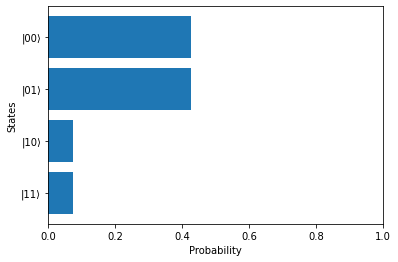

In [12]:
qc = Circuit().h(1).ry(0,np.pi/4)

qubit_count = qc.qubit_count
qc.probability()
print(qc)
task = device.run(qc, shots=0)
result = task.result()

print("Visualizing Probability of Outputs")
output_states=[]
output_prob=[]
for i in range(2**qubit_count):
    b1=bin(i)
    bb=str(b1).replace('0b','')
    output_states.append("|"+bb.zfill(qubit_count)+"⟩")
    output_prob.append(round(result.values[0][i],3))
output_states.reverse()
output_prob.reverse()

# plot 
plt.barh(output_states, output_prob);
plt.xlim([0,1])
plt.xlabel('Probability');
plt.ylabel('States');

In [5]:
qc = Circuit().ry(0,np.pi/4)
task = device.run(qc, shots=1000)
result = task.result()

print(result.measurement_counts)

Counter({'0': 840, '1': 160})


In [8]:
output_states=[]
for i in range(8):
    b1=bin(i)
    bb=str(b1).replace('0b','')
    output_states.append("|"+bb.zfill(2)+"⟩")
print(output_states)

['|00⟩', '|01⟩', '|10⟩', '|11⟩', '|100⟩', '|101⟩', '|110⟩', '|111⟩']


### End